# Riskfolio-Lib Tutorial: 
<br>__[Financionerioncios](https://financioneroncios.wordpress.com)__
<br>__[Orenji](https://www.orenj-i.com)__
<br>__[Riskfolio-Lib](https://riskfolio-lib.readthedocs.io/en/latest/)__
<br>__[Dany Cajas](https://www.linkedin.com/in/dany-cajas/)__
## Part III: Black Litterman Mean Risk Optimization

## 1. Downloading the data:

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf

yf.pdr_override()
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2016-01-01'
end = '2019-12-30'

# Tickers of assets
assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'NBL', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'AGN', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'DHR',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI']
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

/Users/danycajas/anaconda3/envs/github_riskfolio/lib/python3.6/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


[*********************100%***********************]  25 of 25 completed


In [2]:
data.to_excel('Librito.xlsx')

In [3]:
# Calculating returns

Y = data[assets].pct_change().dropna()

display(Y.head())

,AGN,APA,BAX,BMY,CMCSA,CNP,CPB,DE,DHR,HPQ,...,MSFT,NBL,NI,PCAR,PSA,SEE,TGT,TXT,VZ,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-05,0.4098%,-2.0257%,0.4035%,1.9693%,0.0180%,0.9305%,0.3678%,0.5783%,0.1854%,0.9483%,...,0.4562%,0.4478%,1.5881%,0.0212%,2.8236%,0.9758%,1.7539%,0.2410%,1.3734%,-1.0857%
2016-01-06,-1.7102%,-11.4863%,0.2412%,-1.7557%,-0.7727%,-1.2473%,-0.1736%,-1.1239%,-1.1650%,-3.5867%,...,-1.8165%,-5.8247%,0.5547%,0.0212%,0.1592%,-1.5647%,-1.0155%,-3.0048%,-0.9035%,-2.9145%
2016-01-07,-0.0989%,-5.1389%,-1.6573%,-2.7699%,-1.1047%,-1.9769%,-1.2207%,-0.8855%,-2.5666%,-4.6058%,...,-3.4783%,-2.5245%,-2.2066%,-3.0310%,-1.0410%,-3.1557%,-0.2700%,-2.0570%,-0.5492%,-3.0020%
2016-01-08,-1.2172%,0.2736%,-1.6037%,-2.5425%,0.1099%,-0.2241%,0.5707%,-1.6402%,0.0565%,-1.7642%,...,0.3067%,-0.1942%,-0.1538%,-1.1366%,-0.7308%,-0.1448%,-3.3839%,-1.1387%,-0.9719%,-1.1254%
2016-01-11,-0.0301%,-4.3384%,-1.6851%,-1.0215%,0.0915%,-1.1791%,0.5674%,0.5287%,-0.0565%,0.6616%,...,-0.0573%,-5.9682%,1.6435%,0.0000%,0.9869%,-0.1450%,1.4570%,-0.4607%,0.5800%,-1.9919%


## 2. Estimating Black Litterman Portfolios

### 2.1 Calculating a reference portfolio.

In [4]:
import riskfolio.Portfolio as pf

# Building the portfolio object
port = pf.Portfolio(returns=Y)

# Calculating optimum portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,AGN,APA,BAX,BMY,CMCSA,CNP,CPB,DE,DHR,HPQ,...,MSFT,NBL,NI,PCAR,PSA,SEE,TGT,TXT,VZ,ZION
weights,0.0000%,0.0000%,8.7966%,0.0000%,0.0000%,8.8830%,0.0000%,4.3624%,11.8637%,0.0000%,...,15.5096%,0.0000%,9.6431%,0.0000%,0.0000%,0.0000%,7.0727%,0.0000%,3.3113%,0.0000%


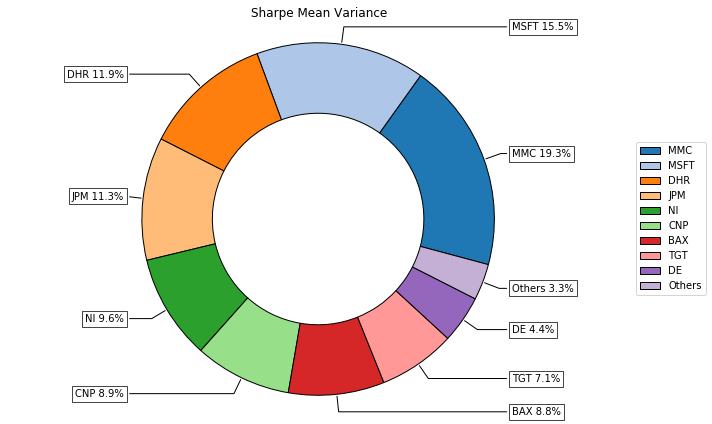

In [5]:
import riskfolio.PlotFunctions as plf

# Plotting the composition of the portfolio

ax = plf.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                  height=6, width=10, ax=None)

### 2.2 Plotting portfolio composition

In [6]:
import riskfolio.ConstraintsFunctions as cf

asset_classes = {'Assets': ['JCI','TGT','CMCSA','CPB','MO','NBL','APA','MMC',
                            'JPM','ZION','PSA','AGN','BAX','BMY','LUV','PCAR',
                            'TXT','DHR','DE','MSFT','HPQ','SEE','VZ','CNP','NI'], 
                 'Industry': ['Consumer Discretionary','Consumer Discretionary',
                              'Consumer Discretionary', 'Consumer Staples',
                              'Consumer Staples','Energy','Energy','Financials',
                              'Financials','Financials','Financials','Health Care',
                              'Health Care','Health Care','Industrials','Industrials',
                              'Industrials','Industrials','Industrials',
                              'Information Technology','Information Technology',
                              'Materials','Telecommunications Services','Utilities',
                              'Utilities'] }

asset_classes = pd.DataFrame(asset_classes)
asset_classes = asset_classes.sort_values(by=['Assets'])

views = {'Disabled': [False, False, False],
         'Type': ['Classes', 'Classes', 'Classes'],
         'Set': ['Industry', 'Industry', 'Industry'],
         'Position': ['Energy', 'Consumer Staples', 'Materials'],
         'Sign': ['>=', '>=', '>='],
         'Weight': [0.08, 0.1, 0.09], # Anual terms 
         'Type Relative': ['Classes', 'Classes', 'Classes'],
         'Relative Set': ['Industry', 'Industry', 'Industry'],
         'Relative': ['Financials', 'Utilities', 'Industrials']}

views = pd.DataFrame(views)

display(views)

,Disabled,Type,Set,Position,Sign,Weight,Type Relative,Relative Set,Relative
0,False,Classes,Industry,Energy,>=,8.0000%,Classes,Industry,Financials
1,False,Classes,Industry,Consumer Staples,>=,10.0000%,Classes,Industry,Utilities
2,False,Classes,Industry,Materials,>=,9.0000%,Classes,Industry,Industrials


In [7]:
P, Q = cf.assets_views(views, asset_classes)

display(pd.DataFrame(P.T))
display(pd.DataFrame(Q))

,0,1,2
0,0.0000%,0.0000%,0.0000%
1,50.0000%,0.0000%,0.0000%
2,0.0000%,0.0000%,0.0000%
3,0.0000%,0.0000%,0.0000%
4,0.0000%,0.0000%,0.0000%
5,0.0000%,-50.0000%,0.0000%
6,0.0000%,50.0000%,0.0000%
7,0.0000%,0.0000%,-20.0000%
8,0.0000%,0.0000%,-20.0000%
9,0.0000%,0.0000%,0.0000%


,0
0,8.0000%
1,10.0000%
2,9.0000%


In [8]:
# Estimate Black Litterman inputs:

port.blacklitterman_stats(P, Q/252, rf=rf, w=w, delta=None, eq=True)

# Estimate optimal portfolio:

model='BL'# Black Litterman
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = False # Use historical scenarios for risk measures that depend on scenarios

w_bl = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w_bl.T)

,AGN,APA,BAX,BMY,CMCSA,CNP,CPB,DE,DHR,HPQ,...,MSFT,NBL,NI,PCAR,PSA,SEE,TGT,TXT,VZ,ZION
weights,0.0000%,0.1776%,8.4891%,0.0000%,0.0000%,2.9930%,5.5668%,1.3180%,9.6521%,0.0000%,...,14.7583%,0.3211%,3.9726%,0.0000%,0.0000%,9.3609%,6.7610%,0.0000%,3.5296%,0.0000%


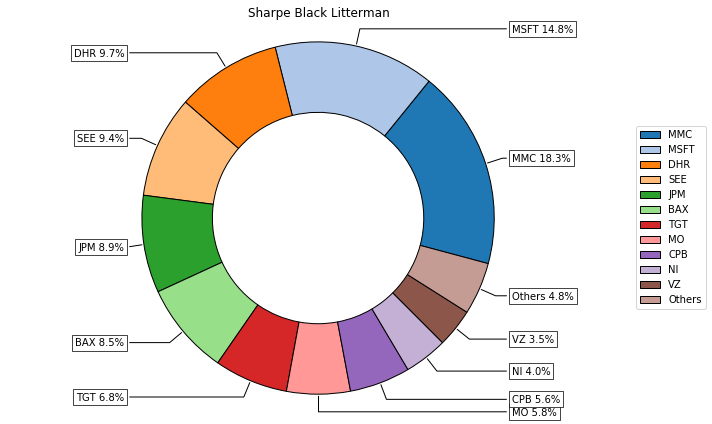

In [9]:
# Plotting the composition of the portfolio

ax = plf.plot_pie(w=w_bl, title='Sharpe Black Litterman', others=0.05, nrow=25,
                  cmap = "tab20", height=6, width=10, ax=None)

### 2.3 Calculate efficient frontier

In [10]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,AGN,APA,BAX,BMY,CMCSA,CNP,CPB,DE,DHR,HPQ,...,MSFT,NBL,NI,PCAR,PSA,SEE,TGT,TXT,VZ,ZION
0,2.7259%,0.0000%,4.2202%,4.0067%,3.0634%,7.3276%,3.2290%,0.3679%,0.6128%,0.0000%,...,0.0000%,0.0529%,11.4941%,0.0000%,14.7634%,0.0653%,4.1235%,0.0000%,11.3553%,0.0000%
1,1.4502%,0.0001%,6.7727%,2.2479%,1.8736%,5.4741%,4.2857%,1.0325%,4.8223%,0.0000%,...,4.6914%,0.3292%,8.3268%,0.0001%,8.1210%,4.4013%,5.4373%,0.0001%,7.7675%,0.0002%
2,0.9262%,0.0000%,7.4220%,1.5002%,1.1511%,4.6874%,4.7647%,1.1835%,6.4658%,0.0000%,...,8.1807%,0.3730%,6.9137%,0.0000%,5.2966%,6.1588%,5.9268%,0.0000%,6.3497%,0.0000%
3,0.4904%,0.0035%,7.9123%,0.9098%,0.4992%,4.0410%,5.1311%,1.2720%,7.7868%,0.0002%,...,10.9270%,0.4070%,5.7571%,0.0001%,2.9710%,7.5124%,6.2961%,0.0001%,5.2302%,0.0004%
4,0.0769%,0.0916%,8.3137%,0.3794%,0.0011%,3.4404%,5.4314%,1.3022%,8.9461%,0.0002%,...,13.3020%,0.3679%,4.7358%,0.0001%,0.9236%,8.6751%,6.6012%,0.0001%,4.2615%,0.0002%


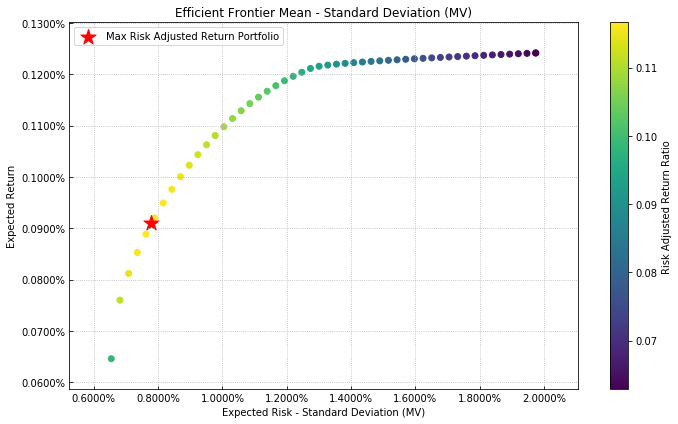

In [11]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu_bl # Expected returns of Black Litterman model
cov = port.cov_bl # Covariance matrix of Black Litterman model
returns = port.returns # Returns of the assets

ax = plf.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                       rf=rf, alpha=0.01, cmap='viridis', w=w_bl, label=label,
                       marker='*', s=16, c='r', height=6, width=10, ax=None)

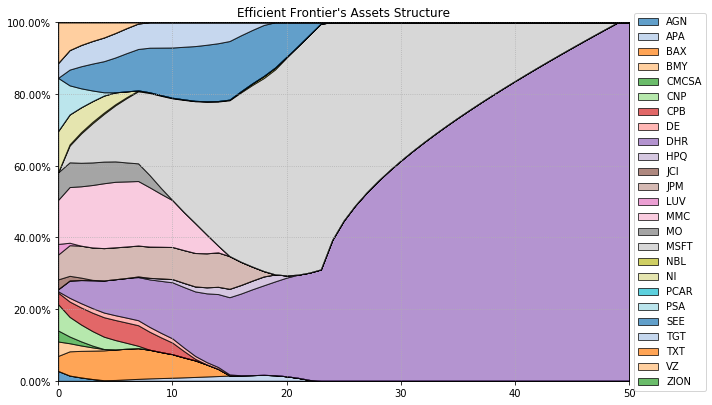

In [12]:
# Plotting efficient frontier composition

ax = plf.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

## 3. Estimating Black Litterman Mean Risk Portfolios

When we use risk measures differents than Standard Deviation, Riskfolio-Lib only considers the vector of expected returns, and use historical returns to calculate risk measures.

### 3.4 Calculate Black Litterman Portfolios for Several Risk Measures

In [13]:
# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded returns.

rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM',
       'CVaR', 'WR', 'MDD', 'ADD', 'CDaR']

w_s = pd.DataFrame([])

for i in rms:
    if i == 'MV':
        hist = False
    else:
        hist = True
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

In [14]:
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,MV,MAD,MSV,FLPM,SLPM,CVaR,WR,MDD,ADD,CDaR
AGN,0.00%,1.67%,1.31%,0.00%,0.00%,9.38%,0.00%,0.00%,0.00%,0.00%
APA,0.18%,0.36%,0.67%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
BAX,8.49%,4.29%,7.35%,0.83%,0.00%,0.00%,0.00%,0.00%,1.14%,0.00%
BMY,0.00%,2.99%,0.94%,0.00%,0.00%,0.00%,0.00%,7.91%,0.00%,0.00%
CMCSA,0.00%,2.43%,0.76%,0.48%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CNP,2.99%,1.59%,2.54%,4.48%,2.69%,0.00%,0.00%,30.82%,12.00%,24.75%
CPB,5.57%,5.29%,4.39%,1.27%,6.69%,14.81%,20.84%,0.00%,0.00%,3.59%
DE,1.32%,0.00%,3.15%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
DHR,9.65%,18.53%,6.15%,38.10%,46.77%,54.52%,6.62%,61.27%,20.76%,47.20%
HPQ,0.00%,0.64%,3.70%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%


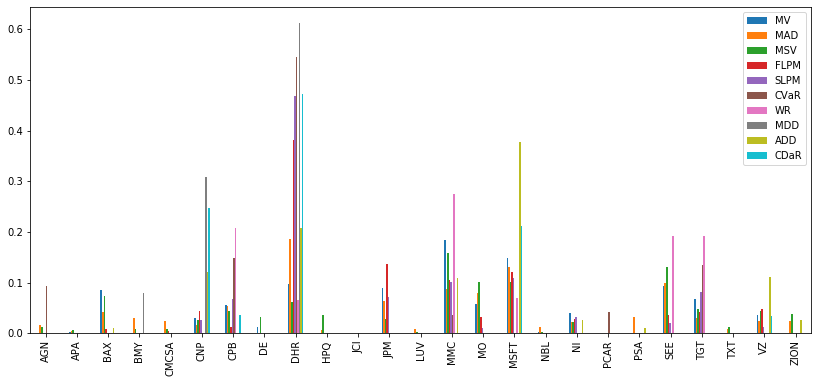

In [15]:
import matplotlib.pyplot as plt

# Plotting a comparison of assets weights for each portfolio

fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)